In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.utils import resample
from scipy.stats import ks_2samp
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Inference: 
- All numerical data
- No null value as Range index is equal to non-null count for each column

In [5]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### _Brief Explanation of following code cell_

_The code defines an <font color='red'>EDA (Exploratory Data Analysis)</font> function for the wine dataset. Analyzing the __distribution of the target variable__, checking for __duplicates__, performing __univariate analysis__, checking for sample distribution, detecting outliers, creating subplots and boxplots, and conducting __bivariate analysis__ by generating a correlation matrix and pair plots are all tasks performed by this function. The visualizations shed light on the distribution of wine quality, identify duplication, depict feature distributions, and investigate relationships between variables. The function seeks to find patterns and links in the dataset for future investigation._
_In order to understand the dataset better, 
to try to identify the main characterstics of the data and to derive some patterns from it._


In [7]:
## This code cell has the EDA function. The function consists of:
# Understanding the distribution of the target variable
# Checking for Duplicates
# Doing a Univariate Analysis
# Checking for sample distribution
# Checking for outliers
# Creating Subplots
# Creating Boxplots
# Doing a Bivariate Analysis
# Creating a Correlation Matrix

def EDA(wine_data):
    
    #Target column value counts 
    print('Checking unique values for the target column i.e. QUALITY...')
    plt.figure(figsize=(6, 4))
    sns.countplot(x="quality", data=wine_data, palette = 'Set2')
    plt.suptitle("Fig 1.1 - Count Distribution of Wine Quality",x=0.5, y=1.02, fontsize=16)
    plt.show()

    #checking duplicates
    print('\nChecking for duplicates...')
    if len(wine_data[wine_data.duplicated()]) == 0:
        print('\nNo duplicates found.')
    else:
        print('\n' + str(len(wine_data[wine_data.duplicated()])) + ' duplicates found!')
    
    #Univariate analysis
    print('\n-------UNIVARIATE ANALYSIS--------')
    print('\nhistograms for all the columns of data...')
    sns.set_palette("viridis")
    wine_data.hist(bins=25, figsize=(10,10))
    plt.suptitle('Fig 1.2 - Distribution of Wine Data Features', x=0.5, y=0.93, fontsize=16)
    plt.show()
    
    #checking for distribution type, mean, min and max values and for any outliers
    print('\nplotting boxplots for all the columns')
    num_subplots = len(wine_data.columns)

    # Calculate the number of rows and columns for the subplots
    num_rows = int(num_subplots / 2) if num_subplots % 2 == 0 else int(num_subplots / 2) + 1
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    # Flatten the axes if there is more than one row
    axes = axes.flatten()

    # Loop through each feature and create a box plot
    for i, column in enumerate(wine_data.columns):
        sns.boxplot(x=wine_data[column], ax=axes[i], palette='Set2')
        axes[i].set_xlabel(column)

    plt.suptitle('Fig 1.3 - Box Plots of Wine Data Features', x=0.5, y=1.02, fontsize=16)
    # Adjusting layout
    plt.tight_layout()
    plt.show()
    
    #BIVARIATE ANALYSIS
    print('\n-------BIVARIATE ANALYSIS-------')
    sns.set(rc={'figure.figsize':(11.7,8.27)})   #increasing plot size
    
    #Correlation matrix
    plt.title("Fig 1.4 - Pearson Correlation Coefficients", x=0.5, y=1.02, fontsize=16)
    sns.heatmap(wine_data.corr(), annot=True)    #making a correlation plot
    plt.show()
    print('\nPairplot of Positively Correlated Variables to QUALITY')
    sns.pairplot(wine_data, vars=["alcohol", "sulphates", "citric acid", "fixed acidity"], hue="quality", palette="viridis")
    plt.suptitle('Fig 1.5 - Pairplot of Positively Correlated Features to Quality', x=0.5, y=1.02, fontsize=16)
    plt.show()
    
    print('\nColumns of high correlation that may lead to multicollinearity')
    for col in range(len(wine_data.corr().columns)):
        for i in range(col):
            if abs(wine_data.corr().iloc[col,i]) >0.65:  #selecting values greater than 65% of correlation
                name = wine_data.corr().columns[col]
                print(name)
                
    return wine_data

#### _Brief Explanation of following code cell_

_The <font color="red">Data Pre-Processing</font> function, shown below, is critical in preparing the dataset for further analysis and modelling activities. This critical stage entails the precise handling of many data elements, such as __managing duplicates, handling outliers, and overall dataset optimization__. By addressing these concerns, the function guarantees that the dataset has been improved and is ready for meaningful analysis, which contributes to the correctness and dependability of following modelling efforts. This is vital for improving the overall quality of the data and creating a solid basis for obtaining important insights and building efficient prediction models._

In [1]:
## This code cell has the Data Preprocessing function. The function consists of:
# Binning the target values
# Removing the Duplicates
# Removing Outliers using Isolation forest
# Upsampling 
# Data Shuffling
# Hypothesis Testing using K-S Test for the unsampled
# Scaling

def data_pre_processing(wine_data):
    
    num_duplicates = len(wine_data[wine_data.duplicated()])
    wine_data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
    print('\nDropped ' + str(num_duplicates) + ' duplicates')
    #manipulating the target variable
    wine_data['quality'] = wine_data['quality'].replace({7: 3, 8: 3, 3: 0, 4: 0, 5: 1, 6: 2})   #binning
    # 0 being bad quality, 1 average, 2 good, 3 very good
    print(wine_data['quality'].value_counts())
    
    #Outlier removal using isolation forest
    print('\nOutlier Removal\n')
    model = IsolationForest(contamination=0.05)
    outlier_labels = model.fit_predict(wine_data)
    # Identify and remove outliers from the dataset
    filtered_data = wine_data[outlier_labels != -1]
    # Display the number of outliers detected
    num_outliers = len(wine_data) - len(filtered_data)
    print(f'Number of outliers detected: {num_outliers}')
    
    print('\nData shape before upsampling '+ str(filtered_data.shape))
    #Data Upsampling
    print('\nUpsampling the data')
    majority_classes = [1, 2]
    minority_classes = [0,3]

    majority_data = filtered_data[filtered_data['quality'].isin(majority_classes)]
    minority_data = filtered_data[filtered_data['quality'].isin(minority_classes)]

    # Upsample the minority classes
    upsampled_minority = pd.concat([resample(minority_data[minority_data['quality'] == cls], 
                                            replace=True,  # Sample with replacement
                                            n_samples=350,
                                            random_state=42) for cls in minority_classes])

    # Combine the majority and upsampled minority data
    upsampled_data = pd.concat([majority_data, upsampled_minority])

    # Shuffle the data
    upsampled_data = upsampled_data.sample(frac=1, random_state=42)
    print('data shape after upsampling ' + str(upsampled_data.shape))
    
    #Hypothesis testing for upsampled data using K-S Test
    for col in list(wine_data.columns):
    # Perform the two-sample KS test
        print('for column ' + col + ' :')
        statistic, p_value = ks_2samp(wine_data[col], upsampled_data[col])

        # Print the results
        print("KS Statistic:", statistic)
        print("P-value:", p_value)

        # Interpret the results
        alpha = 0.05  # significance level
        if p_value < alpha:
            print("Reject the null hypothesis. The samples may come from different distributions.")
        else:
            print("Fail to reject the null hypothesis. There is no significant evidence that the samples come from different distributions.")

        print('\n')
    
    features = upsampled_data.drop('quality', axis=1)
    target = upsampled_data['quality']
    scaler = StandardScaler()
    stan_data = scaler.fit_transform(features)
    stan_data = pd.DataFrame(stan_data, columns= features.columns)
    
    print('\nData after pre-processing')
    stan_data.hist(bins=25, figsize=(10,10))
    plt.suptitle('Fig 2.1 - Distribution of Data after Pre-processing', x=0.5, y=1.0, fontsize=16)
    plt.show()

    print('Quality after Binning and Upsampling')
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target, palette = 'Set2')
    plt.title("Fig 2.2 - Count Distribution of Wine Quality", fontsize=16)
    plt.show()
    
    return stan_data, target

#### _Brief Explanation of following code cell_

_The <font color="red">Model Selection </font>function is an important part of the process as it allows for the __investigation of alternative models__ on the dataset. This stage is systematically evaluating and comparing several modelling techniques to determine which one is most efficient for deriving insights from the dataset. The function assists in choosing the model that best matches the unique needs of the wine dataset by analyzing the performance score and attributes of alternative models. The ultimate objective is to identify the model that not only best fits the data but also improves the interpretability and utility of the insights obtained. The selected model is evaluated over different parameters like recall, precision, f1 score._

In [9]:
## This code cell has the Model Selection function. The function consists of:
# Dataset splitting for testing and training
# 5 Models are tried on the datatset: DT, RF, SVM, KNN, LR
# Best Models is picked based on the results, accuracy
# Evaulation details of the best pick out of the 5

def model_selection(stan_data, target):
    #data splitting for training and testing
    y = target
    X = stan_data
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)
    
    #models dictionary
    classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    }
    
    results = []
    
    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((clf_name, accuracy))
    #sorting the results
    results.sort(key=lambda x: x[1])
    results_df = pd.DataFrame(results, columns=["Method Name", "Accuracy"])
    display(results_df)
    
    #plotting the accuracy
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x="Accuracy", y="Method Name", data=results_df, palette="viridis")
    plt.title("Method Accuracy Comparison (Ascending Order)")
    plt.xlabel("Accuracy")
    plt.ylabel("Method Name")
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.001, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha="left")
    plt.show() 
    
    #EVALUATION
    #creating RandomForestClassifier constructor
    rnd = RandomForestClassifier()
    # fit data
    fit_rnd = rnd.fit(X_train,y_train)
    # display Model Params
    print('Model params are : ', rnd.get_params())
    # predicting score
    rnd_score = rnd.score(X_test,y_test)
    print('score of model is : ', str(rnd_score))
    # display error rate
    y_predict = rnd.predict(X_test)
    print('calculating the error')
    #classification report
    print(classification_report(y_test,y_predict))
  

#### _Brief Explanation of following code cell_

_The <font color="red">Fine-Tuning</font> function is essential for adjusting the model's parameters in order to improve accuracy and overall performance. This meticulous procedure entails fine-tuning critical parameters such as hyperparameters to improve the model's accuracy and efficacy in interpreting the dataset. The function seeks to establish an ideal balance that matches the individual qualities and subtleties of the data by continually fine-tuning these parameters. The objective is to increase the model's prediction powers while ensuring flexibility in different settings. This iterative fine-tuning strategy is critical for increasing the model's utility and dependability across varied datasets, making it a critical stage in the data science pipeline. It is dedicated to ongoing development and parameter optimization for robust and precise model outcomes.._

In [15]:
## This code cell has the Fine Tuning function. The function consists of:
# Applying 20-fold cross validation
# Selecting the best hyperparameters
# passing them into the final model
# Model Evaluation
# Creating Confusion Matrix

def fine_tuning(stan_data, target):
    
    #data splitting for training and testing
    y = target
    
    #removing target column and columns that have low correlation <0.1
    X = stan_data.drop(['free sulfur dioxide','pH','residual sugar','chlorides'], axis = 1)
    
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)
    
    
    #applying grid search for hyperparameter tuning
    # X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 3, 5, 10, 15, 20, 25, 30],
        'min_samples_split': [None, 2, 3, 5],
        'min_samples_leaf': [None, 1, 2, 5],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion':['gini','entropy'],
        'bootstrap': [True]
    }

    # Initializing the Random Forest classifier
    rf_classifier = RandomForestClassifier()

    # Creating GridSearchCV object with cross-validation (e.g., 20-fold)
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=20, scoring='accuracy', n_jobs=-1)

    # Fitting the model to the training data
    grid_search.fit(X, y)

    # Getting the best hyperparameters
    best_params = grid_search.best_params_

    print("Best Hyperparameters:", best_params)
    
    
    #EVALUATION
    
    #creating RandomForestClassifier constructor
    rnd = RandomForestClassifier(**best_params)
    # fitting data
    fit_rnd = rnd.fit(X_train,y_train)
    # predicting score
    rnd_score = rnd.score(X_test,y_test)
    print('score of model is : ',rnd_score)
    # displaying error rate
    y_predict = rnd.predict(X_test)
    print('calculating the error')
    print(classification_report(y_test,y_predict))
    
    #creating a confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
                yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

    # Add labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.show()

Checking unique values for the target column i.e. QUALITY...


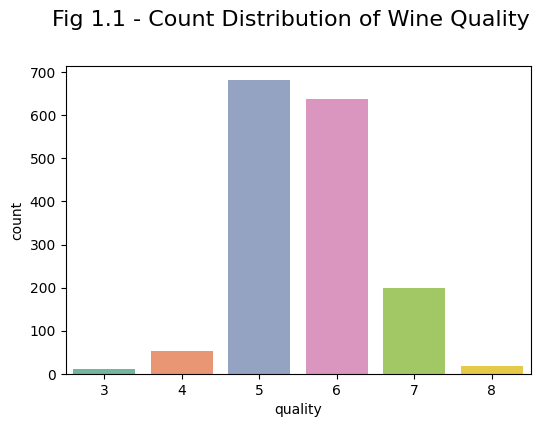


Checking for duplicates...

240 duplicates found!

-------UNIVARIATE ANALYSIS--------

histograms for all the columns of data...


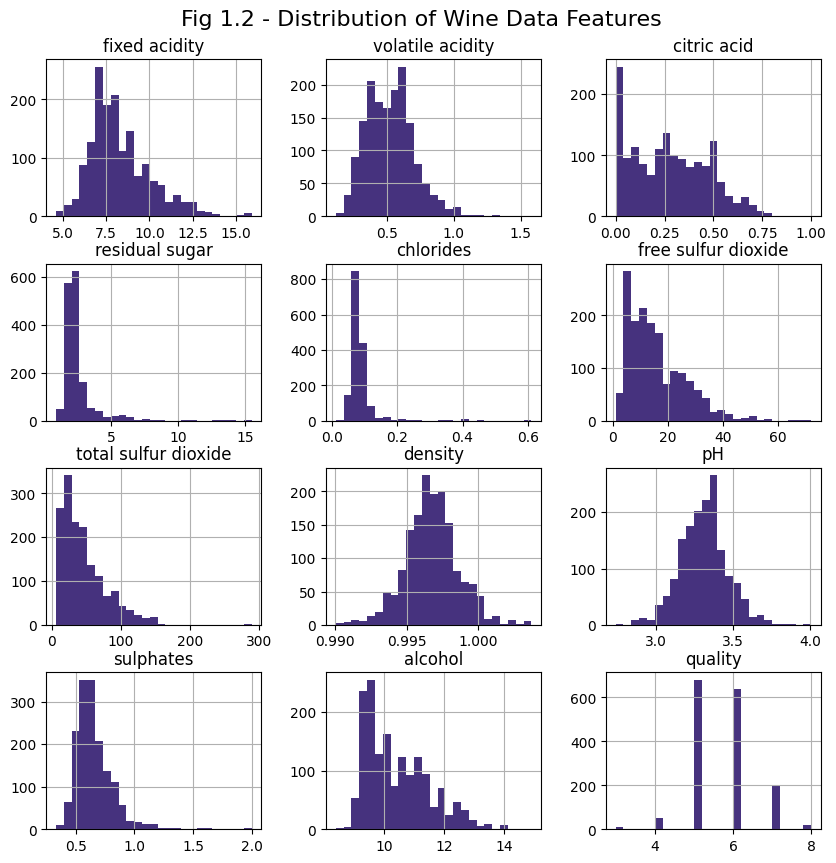


plotting boxplots for all the columns


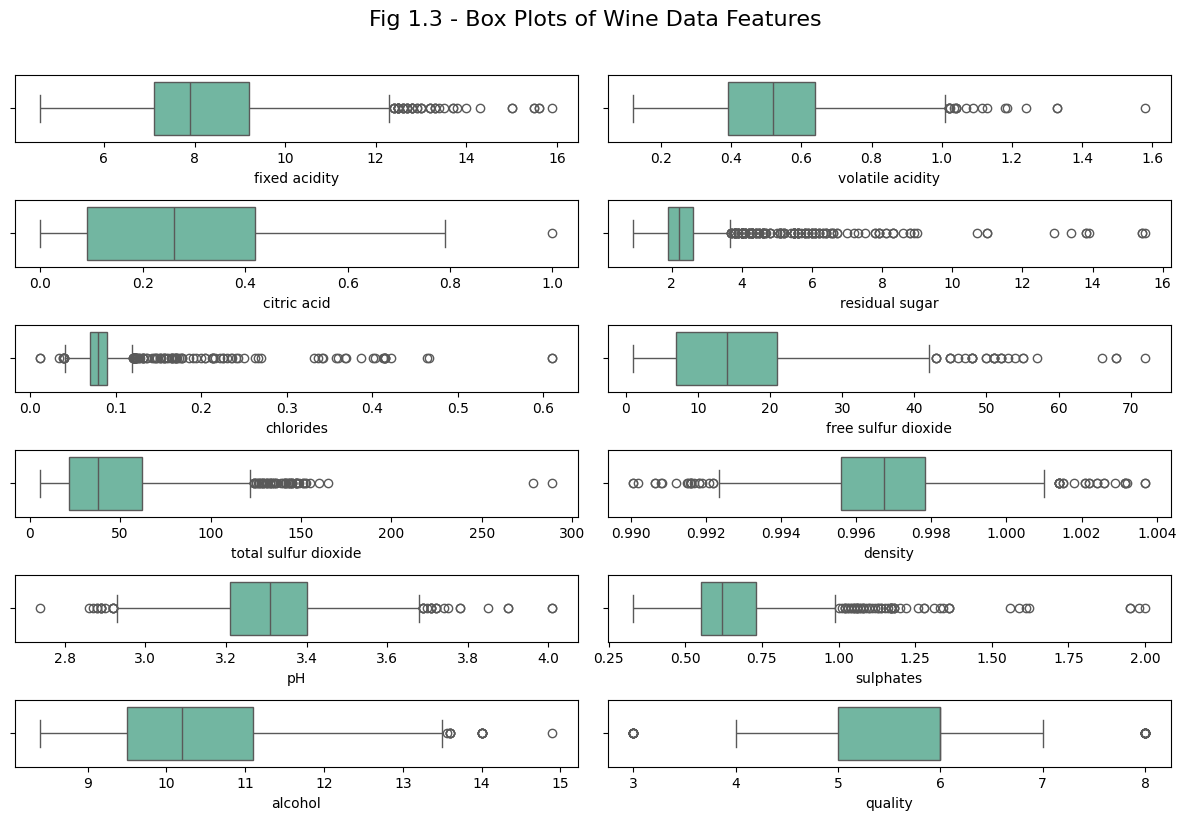


-------BIVARIATE ANALYSIS-------


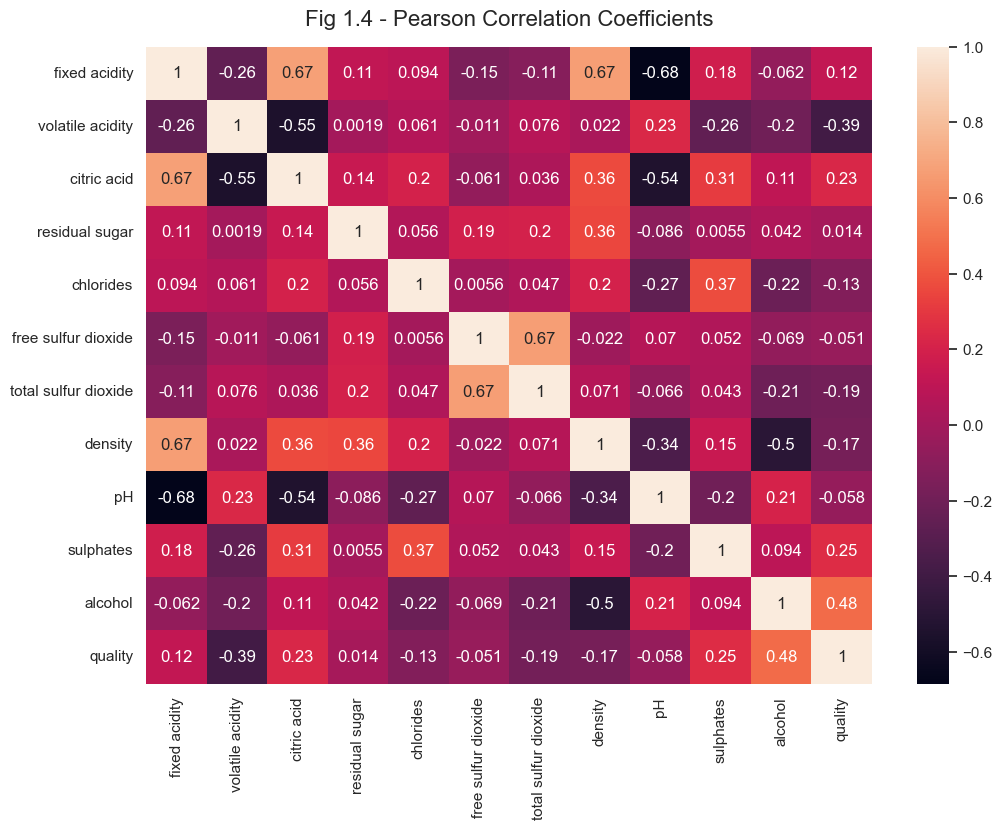


Pairplot of Positively Correlated Variables to QUALITY


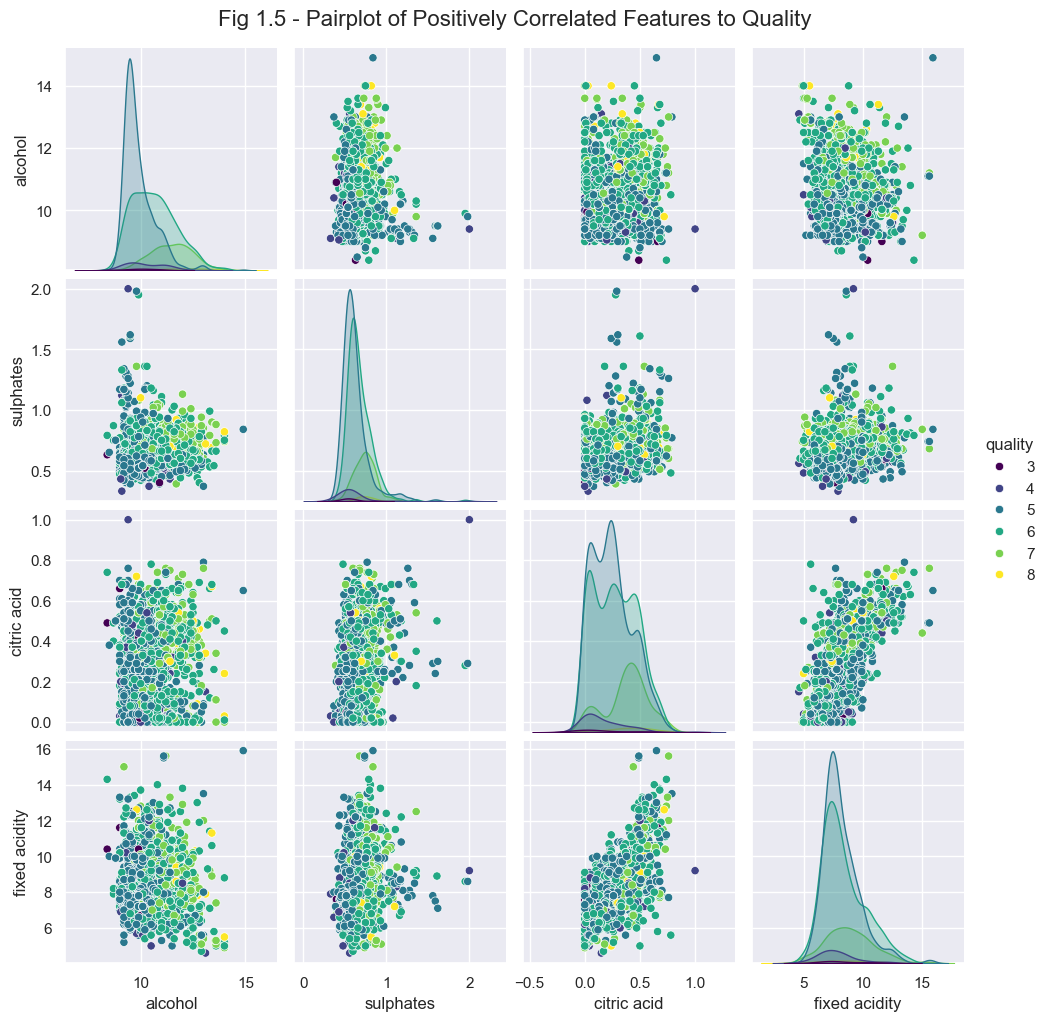


Columns of high correlation that may lead to multicollinearity
citric acid
total sulfur dioxide
density
pH


In [11]:
wine_data = EDA(wine_data)

#### _Comment on previous EDA cell output_
1. As shown in <font color="red">Figure 1.1</font>, the histogram of the 'quality' column shows unequal data distribution, emphasizing the possibility of biased results.
2. <font color="red">Figure 1.2</font> depicts histograms for several chemical properties like as acidity and residual sugar, which provide insight into their distributions.
3. Using boxplots, <font color="red">Figure 1.3</font> highlights outliers, notably in variables such as total sulfur dioxide, indicating considerable variances.
4. As shown in <font color="red">Figure 1.4</font>, heatmap-based correlation analysis reveals links between many features, including both positive and negative correlations.
5. <font color="red">Figure 1.5</font>, the pairplot displaying positively correlated variables to quality, shows the correlations between several pairs of variables such as alcohol, sulphates, citric acid, and fixed acidity.


Dropped 240 duplicates
quality
1    577
2    535
3    184
0     63
Name: count, dtype: int64

Outlier Removal

Number of outliers detected: 68

Data shape before upsampling (1291, 12)

Upsampling the data
data shape after upsampling (1768, 12)
for column fixed acidity :
KS Statistic: 0.01803836664569037
P-value: 0.9588148071845172
Fail to reject the null hypothesis. There is no significant evidence that the samples come from different distributions.


for column volatile acidity :
KS Statistic: 0.04374098934870263
P-value: 0.10175464027836466
Fail to reject the null hypothesis. There is no significant evidence that the samples come from different distributions.


for column citric acid :
KS Statistic: 0.03301685761755883
P-value: 0.3618336814655997
Fail to reject the null hypothesis. There is no significant evidence that the samples come from different distributions.


for column residual sugar :
KS Statistic: 0.02408195405858047
P-value: 0.7519662765277233
Fail to reject the null hyp

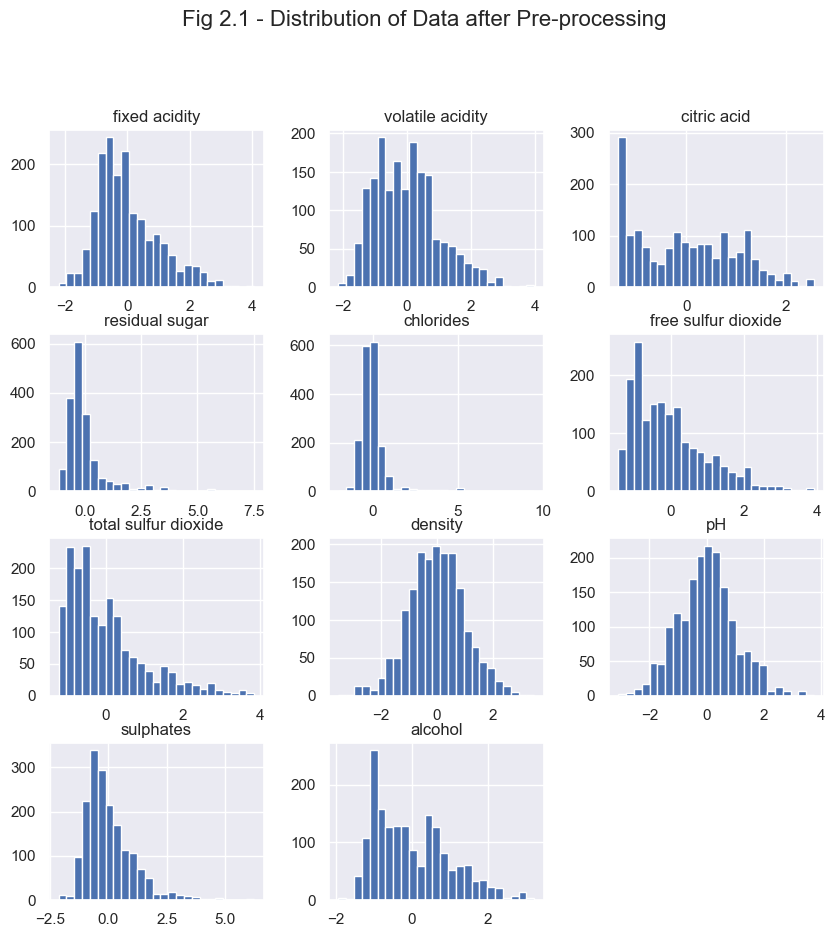

Quality after Binning and Upsampling


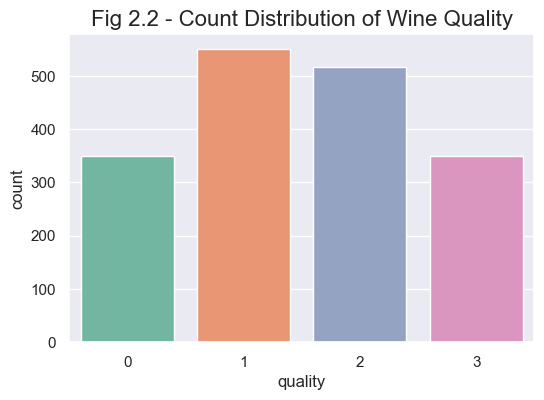

In [12]:
stan_data, target = data_pre_processing(wine_data)

#### _Comment on previous Data Pre-processing cell output_
<ol>
<li><font color="red">( Fig 2.1 )</font> shows that a Hypothesis test using the Kolmogorov-Smirnov (KS) test verified that practically all characteristics had no significant variations in distributions between the original and upsampled datasets.</li>
<li><font color="red">( Fig 2.1 )</font> displays statistical summaries of the dataset after cleaning, dealing with duplicates, and dealing with anomalies such as outliers.</li>
<li><font color="red">( Fig 2.2 )</font> shows that after binning and upsampling the minority data , the count distribution of quality is presented, displaying a balanced distribution across different quality scores.</li>
</ol>

,Method Name,Accuracy
0,Logistic Regression,0.581921
1,KNN,0.598870
2,SVM,0.629944
3,Decision Tree,0.725989
4,Random Forest,0.754237


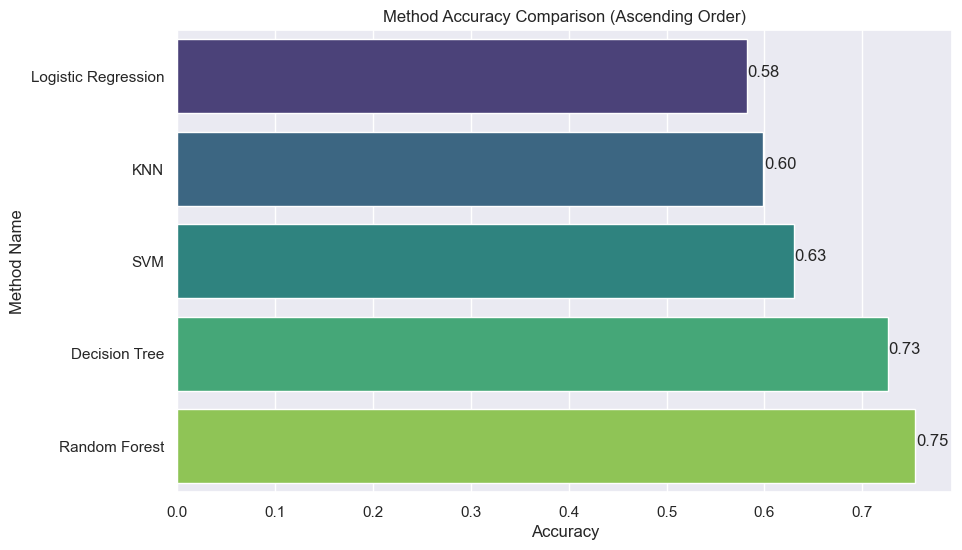

Model params are :  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
score of model is :  0.751412429378531
calculating the error
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.72      0.70      0.71       124
           2       0.55      0.56      0.55        95
           3       0.89      0.89      0.89        71

    accuracy                           0.75       354
   macro avg       0.78      0.78      0.78       354
weighted avg       0.75      0.75      0.75       354



In [17]:
model_selection(stan_data, target)

#### _Comment on previous Model Selection cell output_
<ol>
<li><font color="red">(Fig 3.1)</font> shows the Random Forest model stood out, outperforming all other classifiers in terms of accuracy.</li>
<li>Precision and recall metrics were critical in evaluating the Random Forest model's performance, with the Random Forest model demonstrating good precision for predicting both lower (0) and higher (3) grade wines.</li>
<li> The bar chart in <font color="red">(Fig 3.1)</font> clearly depicts each model's performance, providing a clear comparison.</li>
<li>The Random Forest model performed well in terms of precision, recall, and overall accuracy, making it appropriate for representing a variety of wine quality categories.</li>
 </ol>

Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
score of model is :  0.7655367231638418
calculating the error
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        66
           1       0.68      0.74      0.71       111
           2       0.65      0.54      0.59       106
           3       0.90      0.93      0.92        71

    accuracy                           0.77       354
   macro avg       0.78      0.80      0.79       354
weighted avg       0.76      0.77      0.76       354



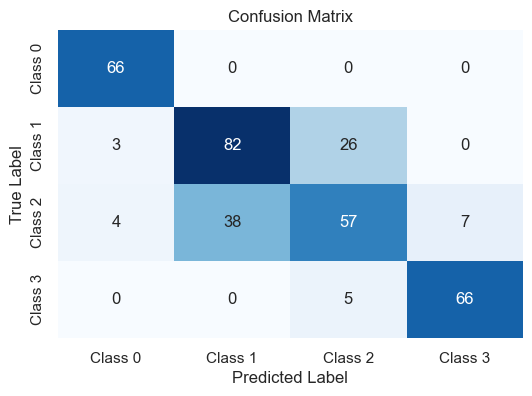

In [16]:
fine_tuning(stan_data, target)

#### _Comment on previous Fine-Tuning cell output_
<ol>
    <li> The Random Forest model, post <b>fine-tuning its hyperparameters</b>, demonstrated enhanced predictive performance.</li>
<li> On the test set, the fine-tuned model showcased its improved predictive capacity.</li>
<li> The <font color ="red">(Fig 4.1)</font> confusion matrix heatmap visually summarizes the model's prediction accuracy across different wine quality classes, providing a comprehensive view of its refined performance.</li></ol>